<a href="https://colab.research.google.com/gist/Larinwa/2e1c05b6f60e4c456c422cd8edcbc5d4/k_means_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Assignment:
##### Using Insurance data set fit a kmeans model on bmi and charges columns in insurance dataset. Differentiate between smokers and non-smokers based on these two columns.


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [ ]:
df = pd.read_csv("insurance.csv")

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
#Extract the needed columns
df_km =pd.DataFrame(data = df[["bmi","charges","smoker"]])


In [ ]:
# Scale columns for normalization
scaler = StandardScaler()
df_km[['bmi', 'charges']] = scaler.fit_transform(df_km[['bmi', 'charges']])

In [ ]:
df_km['smoker'] = df_km['smoker'].map({'yes': 1, 'no': 0})


In [ ]:
#display
df_km

,bmi,charges,smoker
0,-0.453320,0.298584,1
1,0.509621,-0.953689,0
2,0.383307,-0.728675,0
3,-1.305531,0.719843,0
4,-0.292556,-0.776802,0
...,...,...,...
1333,0.050297,-0.220551,0
1334,0.206139,-0.914002,0
1335,1.014878,-0.961596,0
1336,-0.797813,-0.930362,0


In [ ]:
#df_combined = df_X.join(df_y)
df_X =pd.DataFrame(data = df[["bmi","charges"]])


In [ ]:
df_y= pd.DataFrame(data = df[["smoker"]])

In [ ]:
px.scatter(data_frame=df_X, x = 'bmi', y = 'charges',
           width = 600)

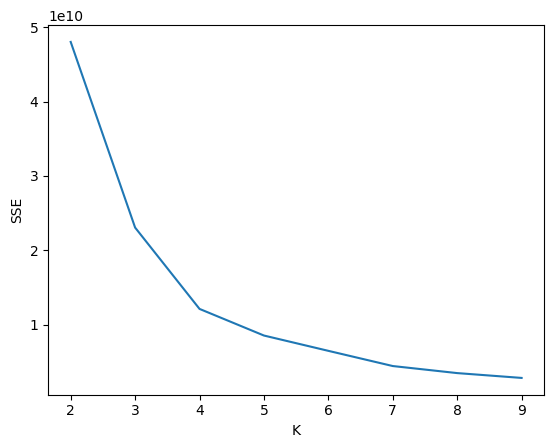

In [ ]:
sse = []
k_values = range(2, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_X[['bmi', 'charges']])
    sse.append(kmeans.inertia_)

plt.plot(k_values, sse)
plt.xlabel('K')
plt.ylabel('SSE')
plt.show()


In [ ]:
# create the model

model = KMeans(n_clusters=3,n_init='auto',random_state=0)
model.fit(df_X)
predictions = model.predict(df_X)


In [ ]:
model.inertia_



858.0852839109805

In [ ]:
predictions

array([1, 0, 0, ..., 0, 1, 2])

In [ ]:
px.scatter(data_frame=df_X, x = 'bmi', y = 'charges',
           width = 600,color = predictions)

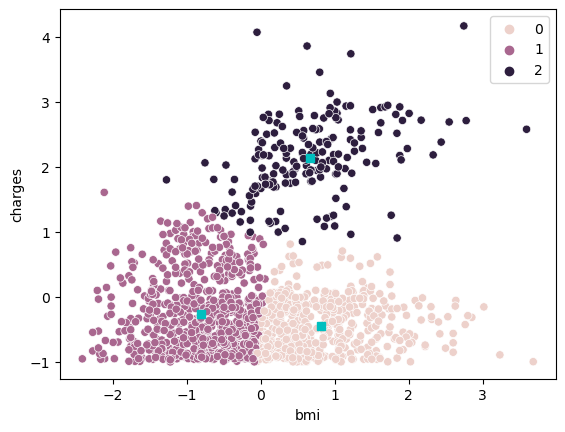

In [ ]:
sns.scatterplot(data=df_X, x = 'bmi', y = 'charges', hue=predictions)
centroid_x , centroid_y = model.cluster_centers_[:,0],model.cluster_centers_[:,1]
plt.plot(centroid_x, centroid_y, 'sc')

In [ ]:
df_X['cluster'] = predictions

In [ ]:
df_km = pd.concat([df_X, df_y], axis=1)

In [ ]:
df_km

,bmi,charges,cluster,smoker
0,27.900,16884.92400,1,1
1,33.770,1725.55230,0,0
2,33.000,4449.46200,0,0
3,22.705,21984.47061,1,0
4,28.880,3866.85520,1,0
...,...,...,...,...
1333,30.970,10600.54830,0,0
1334,31.920,2205.98080,0,0
1335,36.850,1629.83350,0,0
1336,25.800,2007.94500,1,0


In [ ]:
smoker_cc = pd.crosstab(df_km['cluster'], df_km['smoker'])
smoker_cc

smoker,0,1
cluster,,
0,497,0
1,542,115
2,25,159


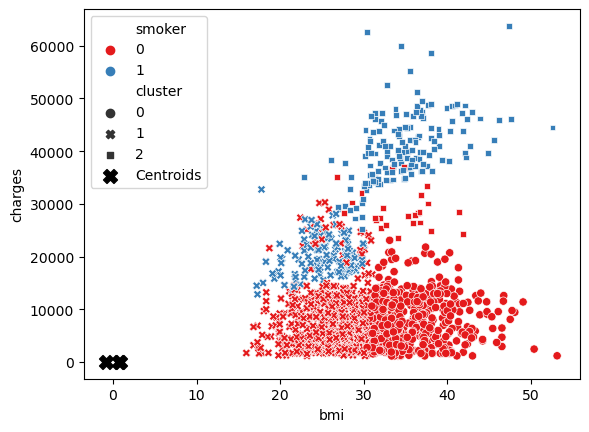

In [ ]:
sns.scatterplot(data=df_km, x='bmi', y='charges', hue='smoker', style='cluster', palette="Set1")
centroid_x, centroid_y = model.cluster_centers_[:, 0], model.cluster_centers_[:, 1]
plt.scatter(centroid_x, centroid_y, c='black', marker='X', s=100, label='Centroids')  # Plot centroids
plt.legend()
plt.show()